# Zorlanmış ve Sönümsüz Kütle-Yay Sistemi Titreşimi

Şekilde kütle ve yaylardan oluşmuş bir sistem yer almaktadır. Kütle bloğu $ F = 10 cos(3t)$ kuvvetine maruz bırakıldığında;

(a) Sistemin hareketine ilişkin diferansiyel denklemi bulalım.

(b) Sistemin doğal frekansını hesaplayalım.

(c) Sistemin periyodunu bulalım.

(d) t = 0 anında sistemin konumu ve hızı 0 ise, sistemin diferansel denklemini numerik integrasyonla çözüp 0, 5 sn aralığında zaman-konum grafiğini çizdirelim

(e) Bulduğunuz grafikten frekans dönümününü yaparak sistemin doğal frekanslarını bulalım.

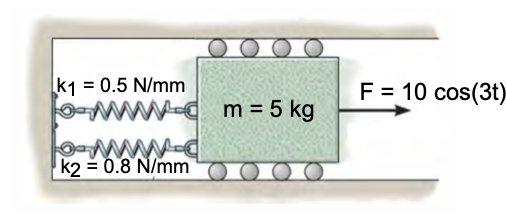


Yay katsayılarını N/m cinsinden yazalım.

$ \displaystyle k_1 = 0.5 \frac {N}{mm} \frac {1000 mm}{1m} = 500 \frac {N}{m}$

$ \displaystyle k_2 = 0.8 \frac {N}{mm} \frac {1000 mm}{1m} = 800 \frac {N}{m}$



Parçacık yaklaşımıyla Newton 2'nci kanunu uygulandığında diferansiyel denklem


$\displaystyle 10*cos(3t)-1300x = 5 \frac {d^2x}{dt^2} \$ yada

(a)  $\displaystyle \frac {d^2x}{dt^2} -260x -2*cos(3t) =0 $  olur.


(b) $ \ddot{x} -w_n^{2} x-2*cos(3t)=0$ eşitliğine uygun şekilde denklem yazılırsa frekans $\displaystyle w_n =\frac {\sqrt{260}}{2 \pi} =  2.56 Hz$ olur

(c) Sistemin periyodu $\displaystyle T = \frac {1}{w_n} \ $

In [14]:
%matplotlib inline
import numpy as np
wn = np.sqrt(260)/(2*np.pi)
T = 1/wn           
print("dogal_frekans w_n = ", round(np.sqrt(260)/(2.5*np.pi),3), 'Hz')
print("Periyod T = ", T, 'sn')



dogal_frekans w_n =  2.053 Hz
Periyod T =  0.3896666109754171 sn


# Nümerik Çözüm


-İlgili kütüphanelerin çağırılması

In [15]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fftpack import fft
%matplotlib inline  

2'nci mertebeden adi diferansiyel denklemi
$ z = x''$ yada $z'-260x-2cos(3t)=0$ şeklinde yazılabilir.

Buna göre fonksion

In [16]:
def fonk(x, t):
    return [x[1], 2* np.cos(3*t*2*np.pi) - 260 * x[0]]

In [17]:
#Baslangic sinir kosulları x(0) = 0 x'(0) = 0
x_o = [0, 0];

# 0-5sn arasında 10000 data oluşturalım
t = np.linspace(0, 5, 10000)

Denklem çözümü

In [18]:
denk_sonuc = odeint(fonk, x_o, t)


In [19]:
res = denk_sonuc[:,0] # res[:,0]= konum verisi, res[:,1]= hız verisidir.

Grafikler

Text(0, 0.5, 'x (m)')

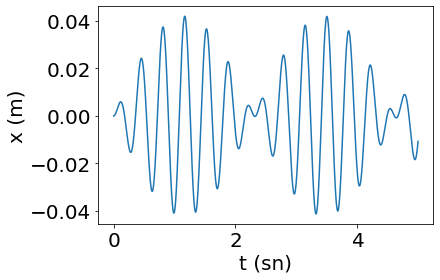

In [20]:
#Konum zaman grafiği
plt.rcParams.update({'font.size': 20})
plt.plot(t, res)
plt.xlabel('t (sn)'); plt.ylabel('x (m)')


Text(0, 0.5, 'Buyukluk')

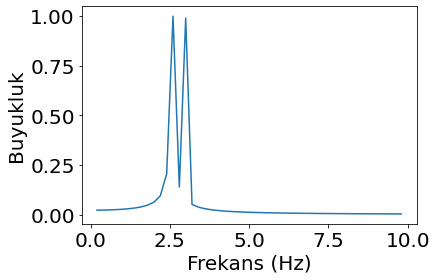

In [21]:
#Frekans grafiği

# Örnekleme frekansı
sample_freq = 1/(t[2] -t[1]) 

# Toplam örnek adeti
total_sample = len(t)

#Discrete FFT
fft_sonuc = fft(res)


frekans_eksen = np.linspace (0.0, sample_freq, total_sample)
buyukluk_eksen = np.abs(fft_sonuc)
# 10 Hz'e kadar çizdirelim.

plt.plot(frekans_eksen[1:50], buyukluk_eksen[1:50]/100)
plt.xlabel('Frekans (Hz)'); plt.ylabel('Buyukluk')


Üstteki şekilde Görüldüğü üzere 

1'nci frekans: 2.58 Hz . Bu sistemin rezonans frekansıdır.

2'nci frekans: 3 Hz dir. Bu $F = 10 cos(3t)$ kuvvetinin oluşurduğu frekanstır.

# Yer değiştirme sinyaline $ \mu = 0, \sigma = 0.01 $ kadar gürültü ekleyelim

In [22]:
from numpy.random import rand
res_gurultulu = res + np.random.normal(0,0.01,len(res));


Text(0, 0.5, 'x (m)')

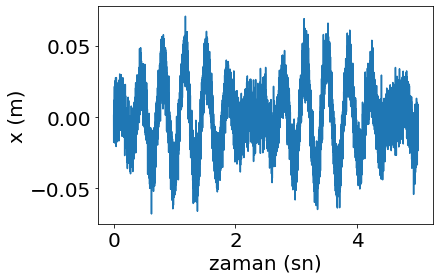

In [23]:
plt.plot(t, res_gurultulu); plt.xlabel('zaman (sn)'); plt.ylabel('x (m)')

Text(0, 0.5, 'Buyukluk')

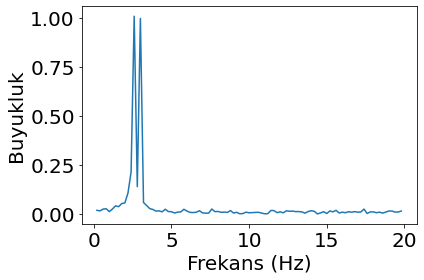

In [24]:
#Discrete FFT
fft_sonuc = fft(res_gurultulu)


frekans_eksen = np.linspace (0.0, sample_freq, total_sample)
buyukluk_eksen = np.abs(fft_sonuc)
# 10 Hz'e kadar çizdirelim.

plt.plot(frekans_eksen[1:100], buyukluk_eksen[1:100]/100)
plt.xlabel('Frekans (Hz)'); plt.ylabel('Buyukluk')

# Sistemi rezonans frekansında tahrik etme

Gürüldüğü üzere yine sisteme ilişkin frekanslar yakalanabilmektedir.

Text(0, 0.5, 'x (m)')

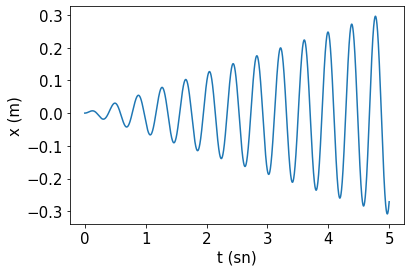

In [25]:
def fonk(x, t):
    return [x[1], 2* np.cos(2.566*t*2*np.pi) - 260 * x[0]]

denk_sonuc = odeint(fonk, x_o, t)
res = denk_sonuc[:,0] # res[:,0]= konum verisi, res[:,1]= hız verisidir.
#Konum zaman grafiği
plt.rcParams.update({'font.size': 15})

plt.plot(t, res)
plt.xlabel('t (sn)'); plt.ylabel('x (m)')


Text(0, 0.5, 'Buyukluk')

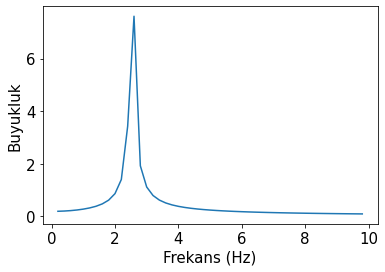

In [26]:
#Frekans grafiği

# Örnekleme frekansı
sample_freq = 1/(t[2] -t[1]) 

# Toplam örnek adeti
total_sample = len(t)

#Discrete FFT
fft_sonuc = fft(res)


frekans_eksen = np.linspace (0.0, sample_freq, total_sample)
buyukluk_eksen = np.abs(fft_sonuc)
# 10 Hz'e kadar çizdirelim.

plt.plot(frekans_eksen[1:50], buyukluk_eksen[1:50]/100)
plt.xlabel('Frekans (Hz)'); plt.ylabel('Buyukluk')